<a href="https://colab.research.google.com/github/Sumaiya-haque/Machine-Learning-project/blob/main/Tylor_swift_song_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("TaylorSwift.csv")

# Extract the lyrics from the dataset
lyrics = data["Lyric"]

# Vectorize the lyrics using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Lyric)

# Apply K-means clustering
num_clusters = 5  # Change this value based on the desired number of clusters/genres
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each song
cluster_labels = kmeans.labels_

# Print the cluster labels
for i in range(len(Lyric)):
    print("Song:", Lyric[i])
    print("Cluster Label:", cluster_labels[i])
    print("----------------------------------")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


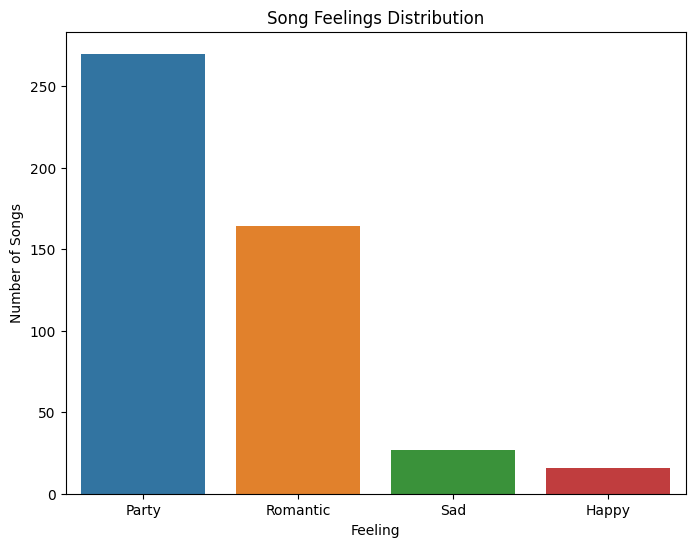

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best Hyperparameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 5}
                                                 Lyric   Feeling
0    vintage tee brand new phone high heels on cobb...  Romantic
1    justin vernon i can see you standing honey wit...     Party
2    we could leave the christmas lights up 'til ja...  Romantic
3    i'm doing good i'm on some new shit been sayin...  Romantic
4    i don't like your little games don't like your...     Party
..                                                 ...       ...
474  drew looks at me i fake a smile so he won't se...     Happy
475  to put it plainly we just couldnt stop writing...  Romantic
476  turn wycd on you're on your grunwald back from...  Romantic
477  zwrotka  siedzę i patrzę jak czytasz z głową p...  Romantic
478  trying just like they say just taking the step...     Party

[477 rows x 2 columns]
Predicted Feeling: Happy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet

# Load the dataset
data = pd.read_csv("/TaylorSwift.csv")
nltk.download('stopwords')
nltk.download('wordnet')
# Drop rows with missing values in the "Lyric" column
data.dropna(subset=["Lyric"], inplace=True)

# Extract the lyrics from the dataset
lyrics = data["Lyric"]

# Tokenize the lyrics and remove stopwords
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(lyrics)

# Apply K-means clustering
k = 4  # Number of clusters (feelings)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Define the mapping of cluster labels to feelings
feeling_mapping = {
    0: "Happy",
    1: "Sad",
    2: "Party",
    3: "Romantic"
}

# Get the cluster labels
feelings = kmeans.labels_

# Map the cluster labels to feelings
feelings = [feeling_mapping[label] for label in feelings]

# Assign feelings to each song
data["Feeling"] = feelings

# Count the number of songs per feeling
feeling_counts = data["Feeling"].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=feeling_counts.index, y=feeling_counts.values)
plt.xlabel("Feeling")
plt.ylabel("Number of Songs")
plt.title("Song Feelings Distribution")
plt.show()

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5],  # Try different numbers of clusters
    'init': ['k-means++', 'random'],  # Try different initialization methods
    'max_iter': [100, 200, 300]  # Try different numbers of iterations
}

# Perform grid search
grid_search = GridSearchCV(KMeans(random_state=42), param_grid, cv=3)
grid_search.fit(X)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize K-means with the best hyperparameters
kmeans = KMeans(n_clusters=best_params['n_clusters'], init=best_params['init'], max_iter=best_params['max_iter'], random_state=42)
kmeans.fit(X)


def get_feeling_keywords(feeling):
    # Define the WordNet synsets for each feeling
    feeling_synsets = {
        "Happy": ["joy", "happiness", "pleasure", "cheer", "delight", "celebration"],
        "Sad": ["sorrow", "grief", "heartache", "misery", "despair", "loneliness"],
        "Party": ["celebration", "fun", "dance", "enjoyment", "festivity", "cheer"],
        "Romantic": ["love", "affection", "desire", "intimacy", "romance"]
    }

    # Get the WordNet synsets for the given feeling keywords
    synsets = [wordnet.synsets(keyword) for keyword in feeling_synsets[feeling]]
    synsets = [synset for sublist in synsets for synset in sublist]

    # Extract the lemma names from the synsets
    lemma_names = [lemma.name() for synset in synsets for lemma in synset.lemmas()]

    # Return a set of unique feeling keywords
    return set(lemma_names)

def predict_feeling_for_lyrics(lyrics_input):
    # Preprocess the input lyrics
    preprocessed_lyrics = vectorizer.transform([lyrics_input])

    # Get the feeling keywords for each feeling
    feeling_keywords = {feeling: get_feeling_keywords(feeling) for feeling in feeling_mapping.values()}

    # Tokenize the input lyrics
    tokenized_lyrics = vectorizer.inverse_transform(preprocessed_lyrics)[0]

    # Predict the feeling based on matching keywords
    predicted_feeling = None
    max_matching_keywords = 0

    for feeling, keywords in feeling_keywords.items():
        matching_keywords = len(set(tokenized_lyrics) & keywords)
        if matching_keywords > max_matching_keywords:
            max_matching_keywords = matching_keywords
            predicted_feeling = feeling

    return predicted_feeling

# Display the lyrics and their corresponding feelings for all songs
print(data[["Lyric", "Feeling"]])

# Example usage
new_lyrics = "I woke up this morning with a smile on my faceFeeling the sunshine, embracing the grace Every moment is filled with pure delightIn this world of happiness, everything feels right"
predicted_feeling = predict_feeling_for_lyrics(new_lyrics)
print("Predicted Feeling:", predicted_feeling)
